## Install and Import Libraries

In [42]:
# Install required modern ML library
%pip install catboost scikit-learn
%pip install seaborn matplotlib pandas

# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from catboost import CatBoostClassifier, Pool


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Loading data


In [43]:
# Load dataset
df = pd.read_csv("/Users/sayenaqureshi/Main-Folder/notebook/Crop and fertilizer dataset (2).csv")

## Steps Taken in order to avoid data leakage


In [44]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
encoder = LabelEncoder()

# Encode ALL categorical columns
for col in df_encoded.columns:
    if df_encoded[col].dtype == "object":
        df_encoded[col] = encoder.fit_transform(df_encoded[col])


In [45]:
print("Columns:", list(df.columns))
df.head()

Columns: ['District_Name', 'Soil_color', 'Nitrogen', 'Phosphorus', 'Potassium', 'pH', 'Rainfall', 'Temperature', 'Crop', 'Fertilizer', 'Link']


,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer,Link
0,Kolhapur,Black,75,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
1,Kolhapur,Black,80,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
2,Kolhapur,Black,85,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
3,Kolhapur,Black,90,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
4,Kolhapur,Black,95,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo


In [46]:
print(df_encoded)
df.head()

      District_Name  Soil_color  Nitrogen  Phosphorus  Potassium   pH  \
0                 0           0        75          50        100  6.5   
1                 0           0        80          50        100  6.5   
2                 0           0        85          50        100  6.5   
3                 0           0        90          50        100  6.5   
4                 0           0        95          50        100  6.5   
...             ...         ...       ...         ...        ...  ...   
4508              1           0       130          80        150  7.0   
4509              1           0       135          80        150  7.0   
4510              1           0       140          80        150  7.0   
4511              1           0       145          80        150  7.0   
4512              1           0       150          80        150  7.0   

      Rainfall  Temperature  Crop  Fertilizer  Link  
0         1000           20    11          17     1  
1         1000 

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer,Link
0,Kolhapur,Black,75,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
1,Kolhapur,Black,80,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
2,Kolhapur,Black,85,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
3,Kolhapur,Black,90,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
4,Kolhapur,Black,95,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo


## Performing EDA


In [47]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4513 entries, 0 to 4512
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   District_Name  4513 non-null   object 
 1   Soil_color     4513 non-null   object 
 2   Nitrogen       4513 non-null   int64  
 3   Phosphorus     4513 non-null   int64  
 4   Potassium      4513 non-null   int64  
 5   pH             4513 non-null   float64
 6   Rainfall       4513 non-null   int64  
 7   Temperature    4513 non-null   int64  
 8   Crop           4513 non-null   object 
 9   Fertilizer     4513 non-null   object 
 10  Link           4513 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 388.0+ KB
None


### Checking for null values


In [48]:
print(df.isnull().sum())


District_Name    0
Soil_color       0
Nitrogen         0
Phosphorus       0
Potassium        0
pH               0
Rainfall         0
Temperature      0
Crop             0
Fertilizer       0
Link             0
dtype: int64


###  Checking for Unique values

In [49]:
print("\nUnique value counts per column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique value counts per column:
District_Name: 5 unique values
Soil_color: 7 unique values
Nitrogen: 27 unique values
Phosphorus: 17 unique values
Potassium: 30 unique values
pH: 7 unique values
Rainfall: 15 unique values
Temperature: 7 unique values
Crop: 16 unique values
Fertilizer: 19 unique values
Link: 278 unique values


### Droping for duplicate values

In [50]:
df = df.drop_duplicates().reset_index(drop=True)

## Visualization

### Heatmap

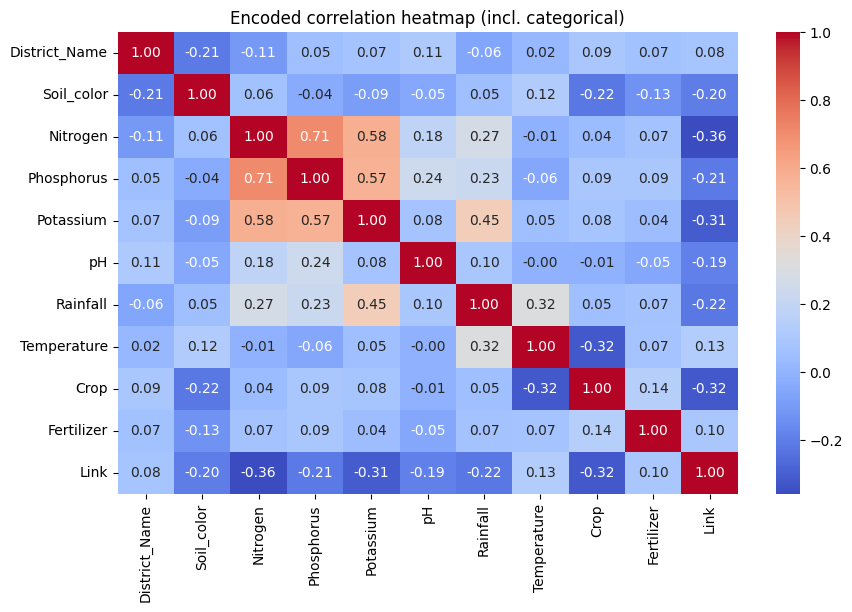

In [51]:
# Encode categorical columns
df_enc = df.copy()
for col in df_enc.select_dtypes(include='object'):
    df_enc[col] = LabelEncoder().fit_transform(df_enc[col])

# Plot correlation heatmap with values
plt.figure(figsize=(10, 6))
sns.heatmap(
    df_enc.corr(),
    cmap='coolwarm',
    annot=True,     # Show correlation values
    fmt='.2f',      # Two decimal places
    cbar=True
)
plt.title("Encoded correlation heatmap (incl. categorical)")
plt.show()

### Class Distribution of **crops**


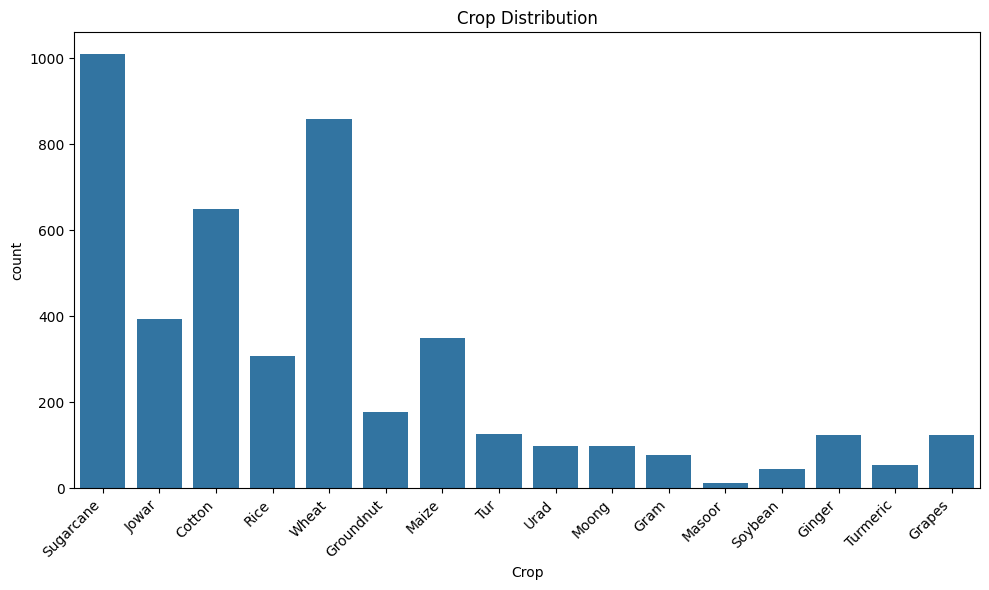

In [52]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Crop')
plt.title("Crop Distribution")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Class distribution of fertilizers


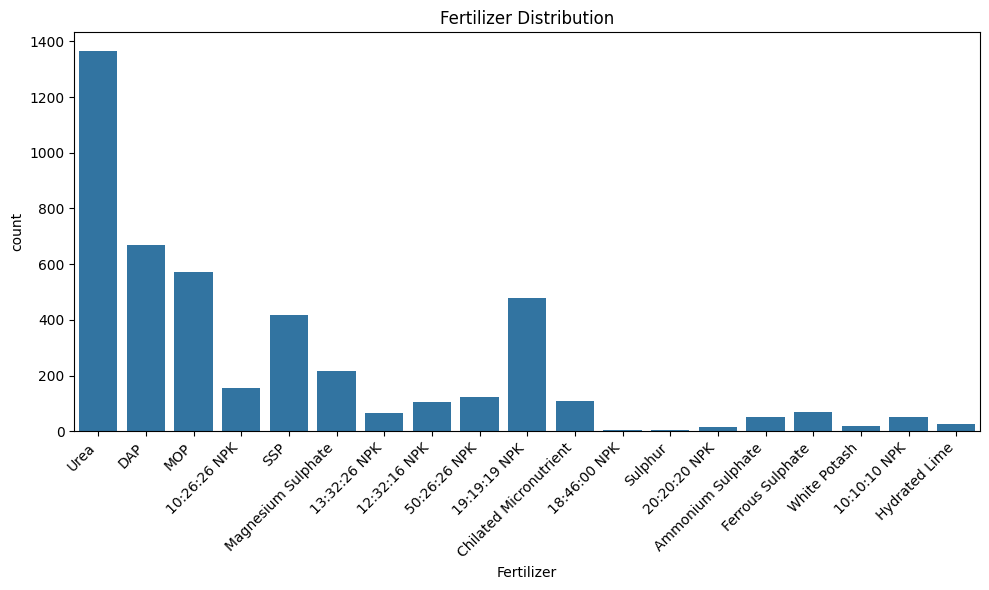

In [53]:
# Target distribution for Fertilizer
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Fertilizer')
plt.title("Fertilizer Distribution")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Plotting Boxplot

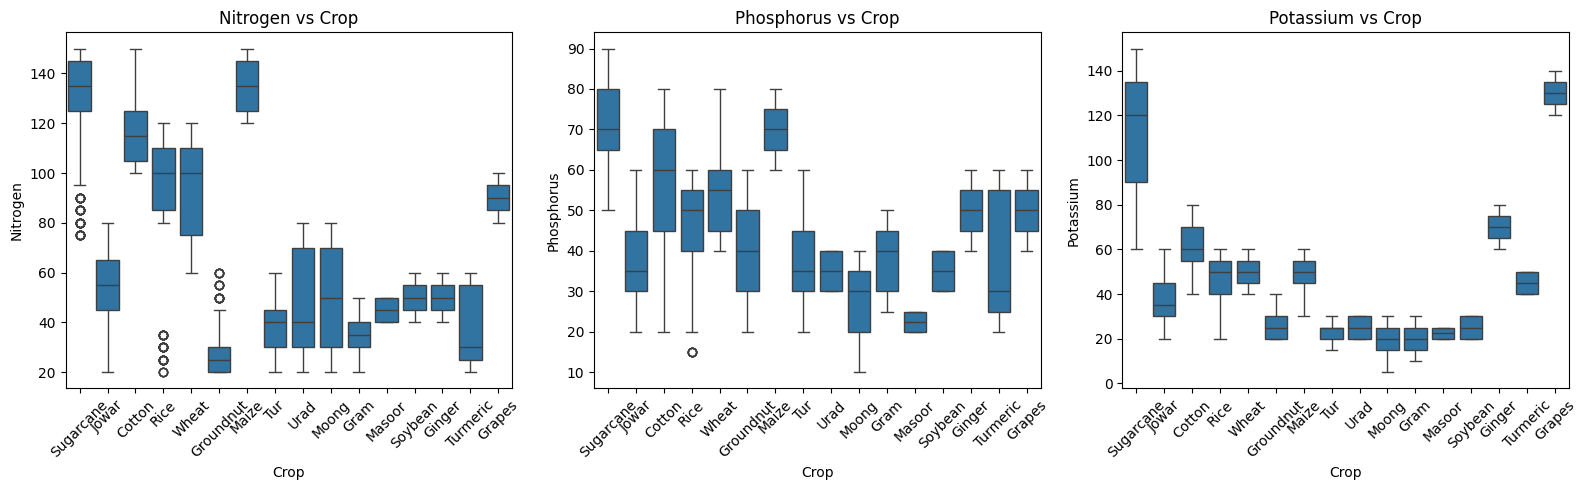

In [54]:
# 1) Boxplots: N, P, K vs Crop (spot differences by crop)
fig, axes = plt.subplots(1, 3, figsize=(16,5))
for ax, feat in zip(axes, ['Nitrogen','Phosphorus','Potassium']):
    sns.boxplot(data=df, x='Crop', y=feat, ax=ax)
    ax.set_title(f"{feat} vs Crop")
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

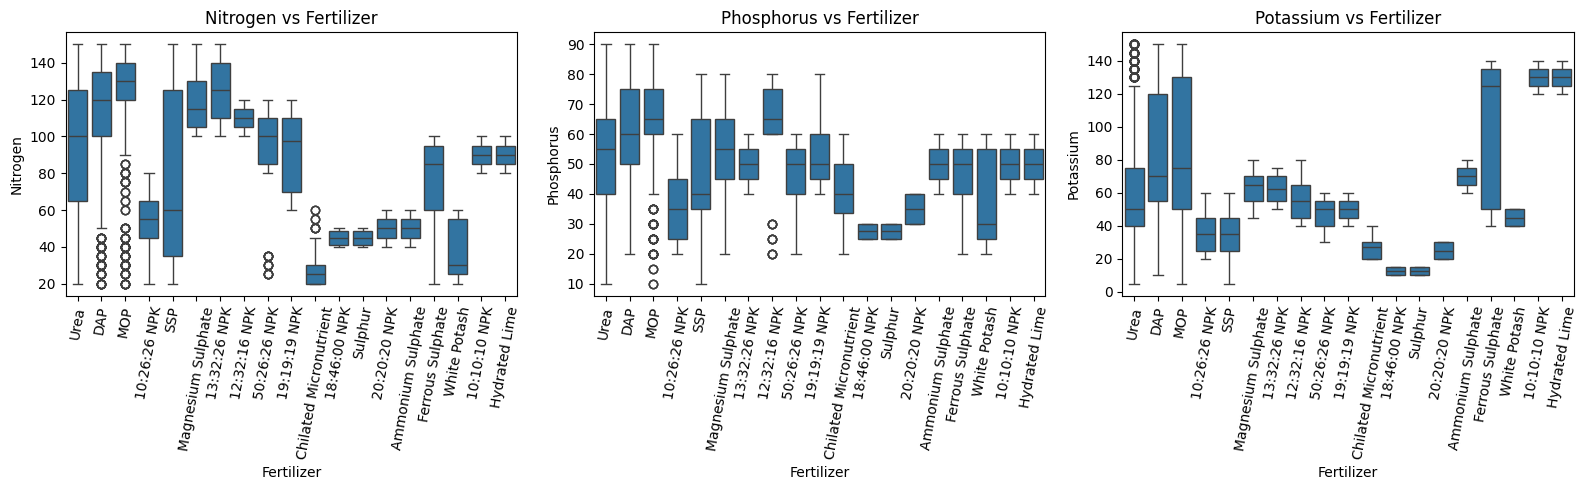

In [55]:
# 2) Boxplots: N, P, K vs Fertilizer (spot differences by fertilizer)
fig, axes = plt.subplots(1, 3, figsize=(16,5))
for ax, feat in zip(axes, ['Nitrogen','Phosphorus','Potassium']):
    sns.boxplot(data=df, x='Fertilizer', y=feat, ax=ax)
    ax.set_title(f"{feat} vs Fertilizer")
    ax.tick_params(axis='x', rotation=80)
plt.tight_layout()
plt.show()


### Avg N, P, K by District

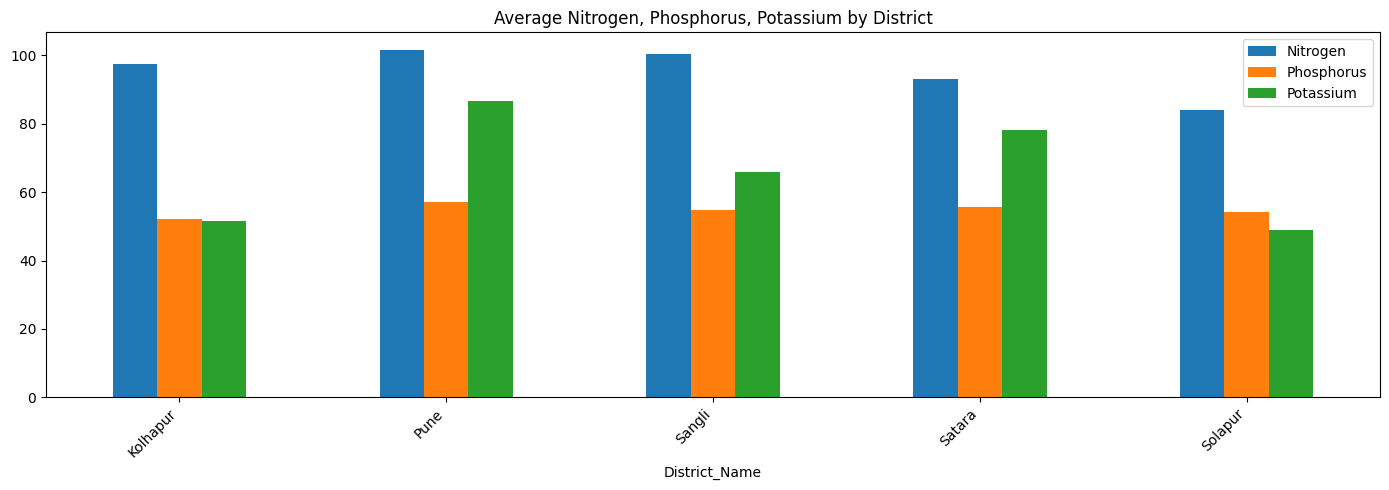

In [56]:
# 3) Average N, P, K by District (see regional patterns)
avg_npk = df.groupby('District_Name')[['Nitrogen','Phosphorus','Potassium']].mean().reset_index()
ax = avg_npk.plot(x='District_Name', kind='bar', figsize=(14,5))
plt.title("Average Nitrogen, Phosphorus, Potassium by District")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Training Model

### Defining target variables

In [71]:


# Features & targets (Using all 8 inputs for maximum prediction power)
feature_cols = ['Nitrogen', 'Phosphorus', 'Potassium', 'pH', 'Rainfall', 'Temperature', 'District_Name', 'Soil_color']
X = df[feature_cols].copy()
y_crop = df['Crop'].copy()
y_fert = df['Fertilizer'].copy()

# Ensure categorical columns are strings for CatBoost
X['District_Name'] = X['District_Name'].astype(str)
X['Soil_color'] = X['Soil_color'].astype(str)

# Indices of the categorical features in the new X (District_Name is 6, Soil_color is 7)
cat_features_idx = [feature_cols.index('District_Name'), feature_cols.index('Soil_color')]

### Encoding the categorical variable

In [58]:
# Label-encode targets (CatBoost accepts strings for y, but encoding helps reports)
from sklearn.preprocessing import LabelEncoder
le_crop = LabelEncoder()
le_fert = LabelEncoder()
y_crop_le = le_crop.fit_transform(y_crop)
y_fert_le = le_fert.fit_transform(y_fert)

### spliting into train and testing

In [74]:
# from sklearn.model_selection import train_test_split

# # Ensure District is treated as categorical (string)
# X['District_Name'] = X['District_Name'].astype(str)

# # Crop split
# X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
#     X, y_crop_le, test_size=0.2, random_state=42, stratify=y_crop_le
# )

# # Fertilizer split
# X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
#     X, y_fert_le, test_size=0.2, random_state=42, stratify=y_fert_le
# )
# Cell 17 (REPLACES the original splitting logic)

from sklearn.model_selection import train_test_split

# NOTE: X is the 8-feature DataFrame from Cell 15.

# 1. ENFORCE STRING TYPE BEFORE SPLITTING (CRITICAL FIX)
# This guarantees that the X_test_c object contains strings ('Kolhapur') and not floats (8.0).
X['District_Name'] = X['District_Name'].astype(str)
X['Soil_color'] = X['Soil_color'].astype(str)

# 2. Crop split
# X_train_c and X_test_c are now guaranteed to have strings for the categorical columns.
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X, y_crop_le, test_size=0.2, random_state=42, stratify=y_crop_le
)

# 3. Fertilizer split
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    X, y_fert_le, test_size=0.2, random_state=42, stratify=y_fert_le
)


### Crop prediction model using CatBoost

In [60]:
from catboost import CatBoostClassifier, Pool

def train_catboost_model(X_train, X_test, y_train, y_test, cat_features_idx):
    """Trains and returns a CatBoost model using best practices."""
    train_pool = Pool(X_train, y_train, cat_features=cat_features_idx)
    valid_pool = Pool(X_test, y_test, cat_features=cat_features_idx)

    model = CatBoostClassifier(
        iterations=1000,
        learning_rate=0.03,
        depth=6,
        l2_leaf_reg=6,
        random_strength=0.5,
        loss_function='MultiClass',
        eval_metric='TotalF1',
        auto_class_weights='Balanced', # Critical for handling class imbalance
        random_seed=42,
        verbose=False
    )

    model.fit(
        train_pool,
        eval_set=valid_pool,
        use_best_model=True,
        early_stopping_rounds=50
    )
    return model

In [61]:
# Prepare results list
results = []

In [62]:
# from catboost import CatBoostClassifier, Pool

# crop_train = Pool(X_train_c, y_train_c, cat_features=cat_features_idx)
# crop_valid = Pool(X_test_c,  y_test_c,  cat_features=cat_features_idx)

# crop_model = CatBoostClassifier(
#     iterations=1000,
#     learning_rate=0.03,
#     depth=6,
#     l2_leaf_reg=6,
#     random_strength=0.5,
#     loss_function='MultiClass',
#     eval_metric='TotalF1',
#     auto_class_weights='Balanced',
#     random_seed=42,
#     verbose=False
# )

# crop_model.fit(
#     crop_train,
#     eval_set=crop_valid,
#     use_best_model=True,
#     early_stopping_rounds=50
# )


### Fertiliser prediction model using CatBoost


In [63]:
# fert_train = Pool(X_train_f, y_train_f, cat_features=cat_features_idx)
# fert_valid = Pool(X_test_f,  y_test_f,  cat_features=cat_features_idx)

# fert_model = CatBoostClassifier(
#     iterations=1000,
#     learning_rate=0.03,
#     depth=6,
#     l2_leaf_reg=6,
#     random_strength=0.5,
#     loss_function='MultiClass',
#     eval_metric='TotalF1',
#     auto_class_weights='Balanced',
#     random_seed=42,
#     verbose=False
# )

# fert_model.fit(
#     fert_train,
#     eval_set=fert_valid,
#     use_best_model=True,
#     early_stopping_rounds=50
# )


In [76]:
# NEW CELL TO INSERT AFTER THE FUNCTION DEFINITION:
# This trains your two models and makes them available for the rest of the script.

crop_model = train_catboost_model(X_train_c, X_test_c, y_train_c, y_test_c, cat_features_idx)
fert_model = train_catboost_model(X_train_f, X_test_f, y_train_f, y_test_f, cat_features_idx)

## Model Evaluation

In [77]:
# Final Evaluation Cell (Your old Cell 21 logic)

from sklearn.metrics import accuracy_score, classification_report

# --- FIX: Ensure categorical features are strings in the test set ---
X_test_c['District_Name'] = X_test_c['District_Name'].astype(str)
X_test_c['Soil_color'] = X_test_c['Soil_color'].astype(str)

# Crop Prediction
y_pred_c = crop_model.predict(X_test_c)
y_pred_c = y_pred_c.flatten().astype(int) # Ensure output is flattened integer array
print("\nCrop Accuracy:", accuracy_score(y_test_c, y_pred_c))
print(classification_report(le_crop.inverse_transform(y_test_c),
                            le_crop.inverse_transform(y_pred_c)))

# --- FIX: Ensure categorical features are strings in the test set ---
X_test_f['District_Name'] = X_test_f['District_Name'].astype(str)
X_test_f['Soil_color'] = X_test_f['Soil_color'].astype(str)

# Fertilizer Prediction
y_pred_f = fert_model.predict(X_test_f)
y_pred_f = y_pred_f.flatten().astype(int) # Ensure output is flattened integer array
print("\nFertilizer Accuracy:", accuracy_score(y_test_f, y_pred_f))
print(classification_report(le_fert.inverse_transform(y_test_f),
                            le_fert.inverse_transform(y_pred_f)))


Crop Accuracy: 0.9867109634551495
              precision    recall  f1-score   support

      Cotton       1.00      1.00      1.00       130
      Ginger       0.93      1.00      0.96        25
        Gram       0.94      1.00      0.97        16
      Grapes       1.00      1.00      1.00        25
   Groundnut       0.92      0.97      0.94        35
       Jowar       1.00      0.94      0.97        79
       Maize       0.97      1.00      0.99        70
      Masoor       0.50      1.00      0.67         2
       Moong       1.00      1.00      1.00        20
        Rice       1.00      0.97      0.98        62
     Soybean       1.00      1.00      1.00         9
   Sugarcane       1.00      1.00      1.00       202
         Tur       1.00      1.00      1.00        25
    Turmeric       1.00      1.00      1.00        11
        Urad       0.91      1.00      0.95        20
       Wheat       1.00      0.98      0.99       172

    accuracy                           0.99  

# Applying more algo's

## LightGBM

In [22]:
%pip install pytorch-tabnet


  Using cached pytorch_tabnet-4.1.0-py3-none-any.whl.metadata (15 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
  Using cached fsspec-2025.9.0-py3-none-any.whl.metadata (10 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached pytorch_tabnet-4.1.0-py3-none-any.whl (44 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 MB 1.3 MB/s  0:00:57m0:00:0100:02
Using cached fsspec-2025.9.0-py3-none-any.whl (199 kB)
Using cached networkx-3.5-py3-none-any.whl (2.0 MB)
Using cached sympy-1.14.0-py3-none-any.whl (6.3 MB)
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [pytorch-tabnet]m [torch]]x]


In [23]:
%pip install lightgbm xgboost pytorch-tabnet scikit-learn pandas torch

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd



  Using cached lightgbm-4.6.0-py3-none-macosx_12_0_arm64.whl.metadata (17 kB)
  Using cached xgboost-3.0.5-py3-none-macosx_12_0_arm64.whl.metadata (2.1 kB)
Using cached lightgbm-4.6.0-py3-none-macosx_12_0_arm64.whl (1.6 MB)
Using cached xgboost-3.0.5-py3-none-macosx_12_0_arm64.whl (2.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [lightgbm]
Note: you may need to restart the kernel to use updated packages.


In [24]:

# -------------------
# 1️⃣ LightGBM
# -------------------
X_crop_enc = df_encoded.drop(columns=["Crop", "Fertilizer"])
y_crop_enc = df_encoded["Crop"]

X_train_c_enc, X_test_c_enc, y_train_c_enc, y_test_c_enc = train_test_split(
    X_crop_enc, y_crop_enc, test_size=0.2, random_state=42, stratify=y_crop_enc
)
lgb_crop = LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=31,
                           subsample=0.8, colsample_bytree=0.8, class_weight='balanced', random_state=42)
lgb_crop.fit(X_train_c_enc, y_train_c_enc)
pred_lgb_crop = lgb_crop.predict(X_test_c_enc)
results.append(["Crop", "LightGBM",
                accuracy_score(y_test_c_enc, pred_lgb_crop),
                f1_score(y_test_c_enc, pred_lgb_crop, average='macro')])


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000261 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 331
[LightGBM] [Info] Number of data points in the train set: 3610, number of used features: 9
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [

## XGBoost

In [25]:
# XGBoost (encoded data)
xgb_crop = XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=6,
                         subsample=0.8, colsample_bytree=0.8, random_state=42, eval_metric='mlogloss')
xgb_crop.fit(X_train_c_enc, y_train_c_enc)
pred_xgb_crop = xgb_crop.predict(X_test_c_enc)
results.append(["Crop", "XGBoost",
                accuracy_score(y_test_c_enc, pred_xgb_crop),
                f1_score(y_test_c_enc, pred_xgb_crop, average='macro')])


In [79]:
X_crop_enc = df_encoded.drop(columns=["Crop", "Fertilizer", "Link"])
y_crop_enc = df_encoded["Crop"]

X_train_c_enc, X_test_c_enc, y_train_c_enc, y_test_c_enc = train_test_split(
    X_crop_enc, y_crop_enc, test_size=0.2, random_state=42, stratify=y_crop_enc
)


In [ ]:
# Cell for TabNet Classifier (Deep Learning Benchmark)

# -------------------
# 3️⃣ TabNet
# -------------------
import torch
# TabNet requires NumPy arrays, not Pandas DataFrames
X_train_np = X_train_c_enc.to_numpy()
X_test_np = X_test_c_enc.to_numpy()
y_train_np = y_train_c_enc.to_numpy()
y_test_np = y_test_c_enc.to_numpy()

# Initialize and train TabNet
tabnet_crop = TabNetClassifier(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size":50, "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='sparsemax',
    verbose=0,
    seed=42
)

# TabNet uses fit(X, y, eval_set) where eval_set is (X_test, y_test)
tabnet_crop.fit(
    X_train_np, y_train_np,
    eval_set=[(X_test_np, y_test_np)],
    max_epochs=200,
    patience=20
)

pred_tabnet_crop = tabnet_crop.predict(X_test_np)

# Append TabNet results
results.append(["Crop", "TabNet",
                accuracy_score(y_test_np, pred_tabnet_crop),
                f1_score(y_test_np, pred_tabnet_crop, average='macro')])

# Show result

In [81]:
results_df = pd.DataFrame(results, columns=["Target", "Model", "Accuracy", "Macro-F1"])
print(results_df)

Empty DataFrame
Columns: [Target, Model, Accuracy, Macro-F1]
Index: []


## Fertilizer Prediction

In [28]:
# LightGBM (encoded data)
X_fert_enc = df_encoded.drop(columns=["Crop", "Fertilizer"])
y_fert_enc = df_encoded["Fertilizer"]

X_train_f_enc, X_test_f_enc, y_train_f_enc, y_test_f_enc = train_test_split(
    X_fert_enc, y_fert_enc, test_size=0.2, random_state=42, stratify=y_fert_enc
)
lgb_fert = LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=31,
                          subsample=0.8, colsample_bytree=0.8, class_weight='balanced', random_state=42)
lgb_fert.fit(X_train_f_enc, y_train_f_enc)
pred_lgb_fert = lgb_fert.predict(X_test_f_enc)
results.append(["Fertilizer", "LightGBM",
                accuracy_score(y_test_f_enc, pred_lgb_fert),
                f1_score(y_test_f_enc, pred_lgb_fert, average='macro')])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000285 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 336
[LightGBM] [Info] Number of data points in the train set: 3610, number of used features: 9
[LightGBM] [Info] Start training from score -2.944439
[LightGBM] [Info] Start training from score -2.944439
[LightGBM] [Info] Start training from score -2.944439
[LightGBM] [Info] Start training from score -2.944439
[LightGBM] [Info] Start training from score -2.944439
[LightGBM] [Info] Start training from score -2.944439
[LightGBM] [Info] Start training from score -2.944439
[LightGBM] [Info] Start training from score -2.944439
[LightGBM] [Info] Start training from score -2.944439
[LightGBM] [Info] Start training from score -2.944439
[LightGBM] [Info] Start training from score -2.944439
[LightGBM] [Info] Start training from score -2.944439
[LightGBM] [Info] Start training from score -2.944439
[LightGBM] [

## Making predictiions for new inputs


In [78]:
# Final Integrated Recommendation System




# --- 1. Define Irrigation Rule-Based Recommender (The Missing Component) ---
def irrigation_recommender(crop, rainfall, temp, soil_color):
    """Provides an irrigation schedule based on predicted crop and environment."""
    
    # Simplified Water Needs
    high_water_crops = ['Paddy', 'Sugarcane', 'Grape']
    low_water_crops = ['Bajra', 'Jowar', 'Cotton']
    
    # Base recommendation on rainfall
    if rainfall < 600:
        base_need = "Heavy"
    elif rainfall < 1200:
        base_need = "Moderate"
    else:
        base_need = "Light"

    # Adjust based on crop type, soil, and temperature
    schedule = ""
    if crop in high_water_crops and base_need in ["Moderate", "Light"]:
        # High-need crop in dry/moderate rain needs frequent watering
        schedule = "Daily Monitoring (High Volume)"
    elif soil_color in ['Red', 'Sandy'] and temp > 30:
        # Fast-draining soil in high heat
        schedule = "Daily Check (Medium Volume)"
    elif crop in low_water_crops and rainfall < 1000:
        schedule = "Weekly Check (Low Volume)"
    else:
        schedule = "Every 2-3 Days"

    return f"{base_need} Irrigation ({schedule})"


# --- 2. Unified Prediction Function (Chaining the System) ---
def get_full_recommendation(input_dict, crop_model, fert_model, le_crop, le_fert, df):
    
    # 2a. Standardize Input for Models (Must contain all 8 features)
    user_df = pd.DataFrame([input_dict])
    
    # 2b. CatBoost Fix: Ensure categorical columns are strings
    user_df['District_Name'] = user_df['District_Name'].astype(str)
    user_df['Soil_color'] = user_df['Soil_color'].astype(str)

    # 3. Predict Crop and Fertilizer
    pred_crop_le = crop_model.predict(user_df).flatten().astype(int)[0]
    pred_fert_le = fert_model.predict(user_df).flatten().astype(int)[0]

    pred_crop_label = le_crop.inverse_transform([pred_crop_le])[0]
    pred_fert_label = le_fert.inverse_transform([pred_fert_le])[0]
    
    # 4. Get Irrigation Recommendation (System Goal Complete)
    irrigation_advice = irrigation_recommender(
        pred_crop_label,
        user_df['Rainfall'].iloc[0],
        user_df['Temperature'].iloc[0],
        user_df['Soil_color'].iloc[0]
    )
    
    # 5. Get Link Lookup
    # Finds the link based on the predicted crop and fertilizer
    link = df[(df['Crop'] == pred_crop_label) & (df['Fertilizer'] == pred_fert_label)]['Link'].iloc[0]

    # 6. Return Final Package
    return pred_crop_label, pred_fert_label, irrigation_advice, link


# --- Interactive Input Function ---
def collect_user_input(feature_list, example_input):
    """Collects all 8 required features from the user interactively."""
    print("\n--- Enter Soil and Environmental Parameters (All 8 Features) ---")
    user_data = {}
    for col in feature_list:
        if col in ['Nitrogen', 'Phosphorus', 'Potassium', 'pH', 'Rainfall', 'Temperature']:
            # Handle numerical input
            prompt = f"Enter {col} (e.g., {example_input[col]}): "
            while True:
                try:
                    val = float(input(prompt))
                    break
                except ValueError:
                    print("⚠️ Invalid input. Please enter a number.")
        else:
            # Handle categorical input (string)
            val = input(f"Enter {col} (e.g., {example_input[col]}): ")
            
        user_data[col] = val
    return user_data

# Features required by your model (All 8)
feature_list = ['Nitrogen', 'Phosphorus', 'Potassium', 'pH', 'Rainfall', 'Temperature', 'District_Name', 'Soil_color']

# Example input is used only for providing hints to the user
sample_input_hints = {
    'Nitrogen': 100.0, 'Phosphorus': 50.0, 'Potassium': 100.0, 'pH': 6.5,
    'Rainfall': 1000, 'Temperature': 20, 'District_Name': 'Kolhapur', 'Soil_color': 'Black'
}

# 1. Collect Input from User
input_data = collect_user_input(feature_list, sample_input_hints)

# 2. Run Prediction using the collected data
crop, fert, irrigation, link = get_full_recommendation(
    input_data, crop_model, fert_model, le_crop, le_fert, df
)

# 3. Print Final Output
print("\n--- Final Integrated Recommendation System Output ---")
print(f"Input Soil/Environmental Conditions: {input_data}")
print(f"✅ 1. Predicted Crop: {crop}")
print(f"✅ 2. Recommended Fertilizer: {fert}")
print(f"✅ 3. Irrigation Advice: {irrigation}")
print(f"🔗 4. Educational Link: {link}")


--- Final Integrated Recommendation System Output ---
Input Soil/Environmental Conditions: {'Nitrogen': 100.0, 'Phosphorus': 50.0, 'Potassium': 100.0, 'pH': 6.5, 'Rainfall': 1000, 'Temperature': 20, 'District_Name': 'Kolhapur', 'Soil_color': 'Black'}
✅ 1. Predicted Crop: Sugarcane
✅ 2. Recommended Fertilizer: DAP
✅ 3. Irrigation Advice: Moderate Irrigation (Daily Monitoring (High Volume))
🔗 4. Educational Link: https://youtu.be/2t5Am0xLTOo
